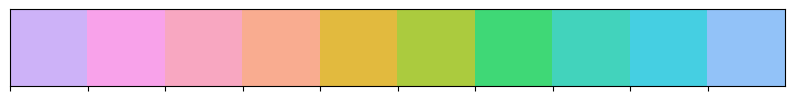

In [1]:
from scripts.analyse_ct import *

import warnings
warnings.filterwarnings('ignore')

In [2]:
analysis = CTAnalysis()

In [3]:
analysis.df

Patient_ID       Dataset  \
0   10840EFC89C5CCA808F8ABB0D353E43ADEEF6B0A9FA478...  Addenbrookes   
1   14575E6B550605963B01230D71973A2F4807F021FD79E0...  Addenbrookes   
2   2A985F59330C52911F6E235BCD766F301E8134F31AE3E2...  Addenbrookes   
3   4149B8E255078911668BF81474B764DBC631BD628F883E...  Addenbrookes   
4   5F669D7388E6B02F667DB1B66D41B4D06A6B762F6301BD...  Addenbrookes   
..                                                ...           ...   
66  55A3F16EF4E33BD52E4F06ACB3704D52E335D342288FB5...  Addenbrookes   
67  48658D52F9798C739F9E3ADD931EF72FE2BB79D59DE581...  Addenbrookes   
68  2D715582E2B03179E085DEF36BE4D514A062543E16C011...  Addenbrookes   
69  2B10D6A86341BD064D9B97BEBA7724CAD60EA11DCF2593...  Addenbrookes   
70  1CED1EFFCD996554AB2D956EA11B30ACC6BCFC6D024742...  Addenbrookes   

               Found? Date of Positive Swab Date of Pneumothorax CXR  \
0   CT Reports Search            26/03/2020                      NaN   
1   CT Reports Search            09/04/2020                      NaN   
2           Algorithm            01/04/2020               16/04/2020   
3           Algorithm            25/03/2020               24/03/2020   
4           Algorithm            12/04/2020               02/06/2020   
..                ...                   ...                      ...   
66      Report Search            21/12/2020                      NaN   
67      Report Search            19/02/2021                      NaN   
68      Report Search            02/01/2021                      NaN   
69      Report Search            08/01/2021                      NaN   
70      Report Search            25/12/2020                      NaN   

                     CT?    CT Date/s  \
0   Yes (8 months later)   17/12/2020   
1          No - all CXRs   29/01/2020   
2                    Yes   18/04/2020   
3          No - all CXRs  see comment   
4                    Yes   01/06/2020   
..                   ...          ...   
66                   Yes   09/01/2021   
67                   Yes   30/01/2021   
68                   Yes   02/02/2021   
69                   Yes   22/01/2021   
70                   Yes   08/01/2021   

                                Radiological Findings  \
0                                                 NaN   
1                                                 NaN   
2   Cysts/Bulla,Ground Glass,Consolidation,Irregul...   
3                                                 NaN   
4                                             Nodules   
..                                                ...   
66  Consolidation,Ground Glass,Irregular Bronchial...   
67                              Nodules,Consolidation   
68  Irregular Bronchial Dilatation,Consolidation,G...   
69  Irregular Bronchial Dilatation,Consolidation,G...   
70  Ground Glass,Irregular Bronchial Dilatation,Co...   

   Predominant Pathological Pattern  No. of Zones Involved  Severity of COVID  \
0                               NaN                    NaN                NaN   
1                               NaN                    NaN                NaN   
2                 Acute Lung Injury                    6.0   Severe (66-100%)   
3                               NaN                    NaN                NaN   
4                         Non-COVID                    0.0       Mild (1-33%)   
..                              ...                    ...                ...   
66                Acute Lung Injury                    6.0   Severe (66-100%)   
67             Organising Pneumonia                    4.0       Mild (1-33%)   
68             Organising Pneumonia                    6.0   Severe (66-100%)   
69             Organising Pneumonia                    6.0   Severe (66-100%)   
70                    Classic COVID                    6.0  Moderate (33-66%)   

   Background Lung Disease Emphysema Severity Cysts / Cavity?  \
0                      NaN                NaN             NaN   
1                      NaN                Na

In [4]:
analysis.df['Likely Cause of Pneumothorax'].value_counts()

Unclear               17
Predates COVID        13
Trauma                 9
Iatrogenic             9
No CT                  8
Barotrauma             4
Unrelated_to_COVID     4
No Pneumothorax        3
PE/Infarct             1
Cysts                  1
COVID + emphysema?     1
Name: Likely Cause of Pneumothorax, dtype: int64

# With Barotrauma, PE, Trauma, and Iatrogenic

In [5]:
included_causes = ['Unclear', 'Iatrogenic', 'Trauma', 'Cysts', 'Barotrauma', 'PE/Infarct', 'Unrelated_to_COVID']
analysis.keep_only_selected_causes(included_causes)
len(analysis.df)

45

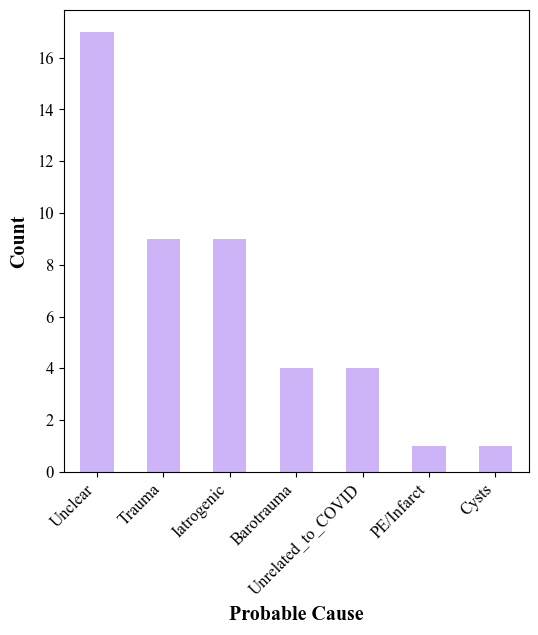

In [6]:
analysis.df['Likely Cause of Pneumothorax'].value_counts().plot(kind='bar', rot=45, xlabel='Probable Cause', ylabel='Count')
_ = plt.xticks(horizontalalignment='right')

# Exclude Unrelated to COVID, Trauma, and Iatrogenic

In [7]:
excluded_causes = ['Iatrogenic', 'Trauma', 'Unrelated_to_COVID']
analysis.remove_selected_causes(excluded_causes)

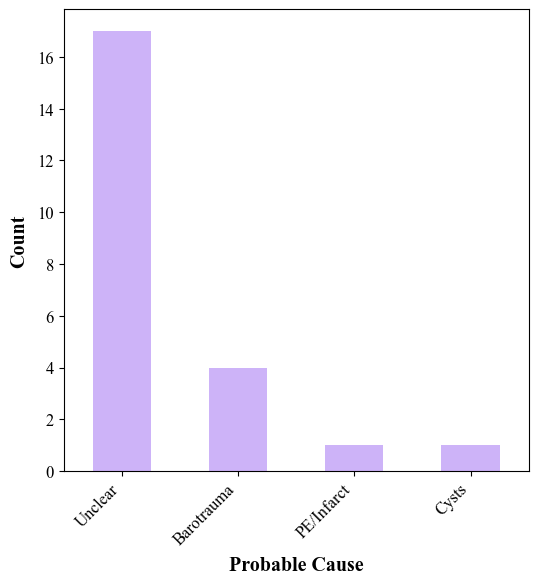

In [8]:
analysis.df['Likely Cause of Pneumothorax'].value_counts().plot(kind='bar', rot=45, xlabel='Probable Cause', ylabel='Count')
_ = plt.xticks(horizontalalignment='right')

Number of CTs of PPV patients included:  13
Number of CTs of non-PPV patients included:  10


ppv          Radiological Finding    On PPV  PPV status  Not on PPV  \
0                   Consolidation  0.846154      On PPV         NaN   
1                           Cysts  0.230769      On PPV         NaN   
2                    Ground Glass  1.000000      On PPV         NaN   
3    Irreg. Bronchial\nDilatation  0.538462      On PPV         NaN   
4                         Nodules  0.230769      On PPV         NaN   
5                    Reticulation  0.153846      On PPV         NaN   
6                   Consolidation       NaN  Not on PPV         0.8   
7                           Cysts       NaN  Not on PPV         0.1   
8                    Ground Glass       NaN  Not on PPV         0.7   
9    Irreg. Bronchial\nDilatation       NaN  Not on PPV         0.7   
10                        Nodules       NaN  Not on PPV         0.0   
11                   Reticulation       NaN  Not on PPV         0.3   

ppv  Percentage of CTs  
0                   84  
1                   23  
2                  100  
3                   53  
4                   23  
5                   15  
6                   80  
7                   10  
8                   70  
9                   70  
10                   0  
11                  30

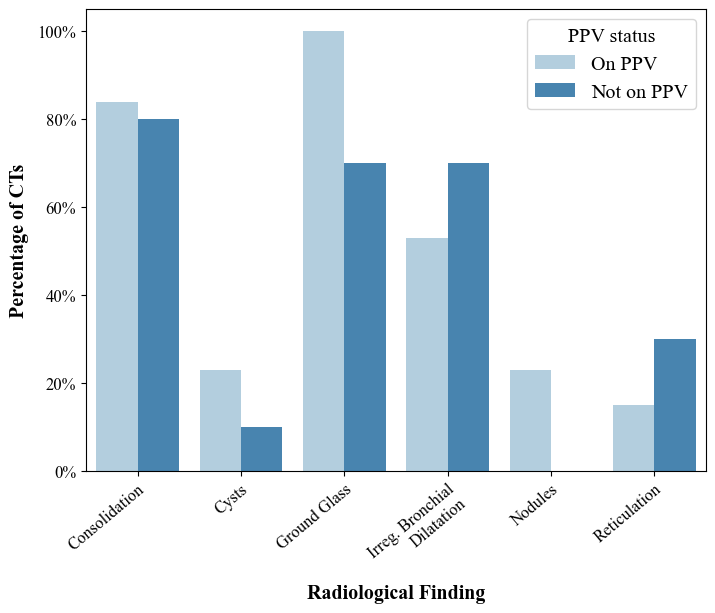

In [9]:
df, fig = analysis.ct_findings_by_ppv()
df

Number of CTs of PPV patients included:  13
Number of CTs of non-PPV patients included:  10


Predominant Pathological Pattern         ppv  Percentage of CTs
0                 Acute Lung\nInjury      On PPV                 61
1             Atypical for\nCOVID-19  Not on PPV                 20
2             Atypical for\nCOVID-19      On PPV                  7
3              Organising\nPneumonia  Not on PPV                 70
4              Organising\nPneumonia      On PPV                 15
5  Peripheral GGO\n+/- Consolidation      On PPV                 15
6  Peripheral GGO\n+/- Consolidation  Not on PPV                 10

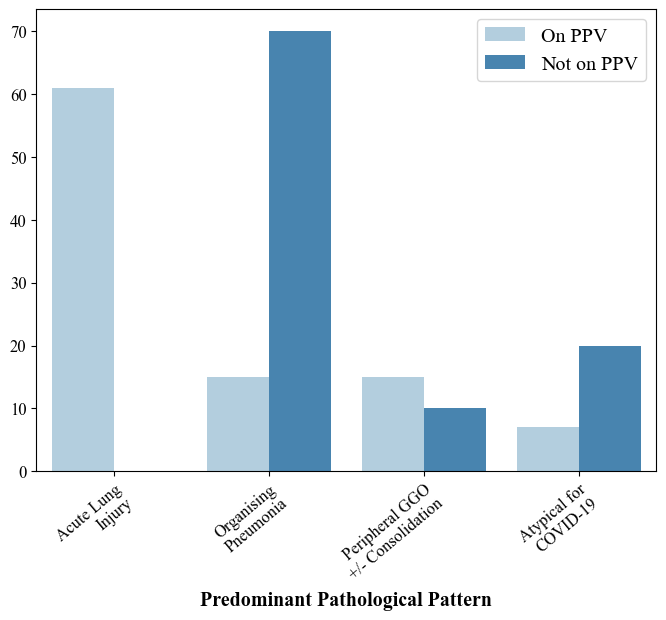

In [11]:
df, fig = analysis.ct_pattern_by_ppv()
df